# DATA INSIGHTS AND MODELING OF SHIPPING DATA

 **Author: Phanindra Kumar Chintapalli** <br> 
 **Date: 7th January 2019**<br>
 **Email: chphani2014@gmail.com** <br>


### Introduction

    Our aim here is to generate insights of given shipment data and perform modeling to it by using clustering techniques

### Raw Data Statistics:

Upon an initial glance at the data, we can observe that:
* The data has 202 rows and 35 columns. 
* There were 29 Categorical Variables, 2 date-time and  3 numeric columns. 

### Approach:

We approached the problem by the following procedure:

* We performed Exploratory Data Analysis, trying to look for the distribution of different classes in each column in order to gather more insights about the data. We made several different types of explorations using a wide variety of data visualization techniques to understand the statistic information about the missingness and/or groups of each class to the corresponding columns thoroughly.  


* For each of the categorical columns, we now check the districution of every class available in the respective column. We then consider the top most repetitive classes in the column such that we dont loose more than 15% of the total distribution, thereby capturing only the most valuable information in every column and having the dimension of the data in check. <br>



* For each of the selected classes in respective columns, we then one-hot encode the data for further analysis.



* We then did a meticulous correlation analysis between meaningful columns. Columns with more than 95% correlation were dropped to further reduce the dimension of the data to eventually improve model's capability. <br>



* Non-categorical variables were scalled using Standard Scaling Technique.



* Once we had the whole cleaned dataset, we then perform clustering analysis on the data using a wide-variety of clustering algorithms to compare the results produced. 



* Later we apply a dimentionality reduction technique, PCA  to reduce the dimensions of the data to 2 components with 50% retention of variance to further do Kmeans clustering and visualize the clustering results.




### Below is the code for the above mentioned approach

In [111]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy.linalg import *

%matplotlib inline

### Raw Data Statistics

In [112]:
df = pd.read_excel('C:/Users/chint/Downloads/banana-republic-copy.xls')
df.head(10)# first 10 rows 

,SHIPPER,SHIPPER ADDRESS,CONSIGNEE,CONSIGNEE ADDRESS,ZIPCODE,NOTIFY,NOTIFY ADDRESS,BILL OF LADING,ESTIMATED TIME OF ARRIVAL,ACTUAL TIME OF ARRIVAL,...,DISTRIBUTION PORT,HOUSE vs MASTER,MASTER B/L,CARRIER CODE,CARRIER NAME,CARRIER ADDRESS,CARRIER CITY,CARRIER STATE,CARRIER ZIP,PLACE OF RECEIPT
0,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,,,UASI7782768928,2013-10-09,2013-10-01,...,,H,EGLV003302201747,UASI,UPS SCS (ASIA) LIMITED,9/F 100 TEXACO ROAD,HONG KONG,,,"KAOHSIUNG, TW"
1,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,,,UASI7782797220,2013-09-30,2013-10-01,...,,H,EGLV003302201747,UASI,UPS SCS (ASIA) LIMITED,9/F 100 TEXACO ROAD,HONG KONG,,,"KAOHSIUNG, TW"
2,EXPORTADORA DE FRUTOS Y VEGETABLES,ENTRADA DE LAS CABUYAS,SANJAY ENTERPRISE,120 SKY WAY AVENUE,0,,,TSCW10901908,2013-10-06,2013-10-01,...,"Buffalo-Niagara Falls, New York",,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
3,EXPORTADORA DE FRUTOS Y VEGETABLES,ENTRADA DE LAS CABUYAS,YALINI ENTERPRISES INC,38 THORNMOUNT DRIVE UNIT 7,0,,,TSCW10901928,2013-10-04,2013-10-01,...,"Buffalo-Niagara Falls, New York",,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
4,LAS ANTILLAS EXPORT Y/O PEDRO RESTI,SABANETA KM 5 1/2,SMS PRODUCE INC,2499 EGLINGTON AVENUE EAST,0,,,TSCW10901989,2013-09-30,2013-10-01,...,"Buffalo-Niagara Falls, New York",,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
5,EXPORTADORA DE FRUTOS Y VEGETALES L,ALTO DEL YAQUE ARRIBA #40,ACROPOLLYS TRADING CORP,7266 NW 70ST,0,,,TSCW10902047,2013-10-03,2013-10-01,...,,,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
6,DINU-S & COMPANY,"1, CARRETERA JAMO, LOS RIELES",SMS PRODUCE INC,2499 EGLINGTON AVENUE EAST,0,,,TSCW10902058,2013-09-26,2013-10-01,...,"Buffalo-Niagara Falls, New York",,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
7,"K.P. EXPORT, SRL","CALLE PRINCIPAL DE LAS CABUYAS, SEC LA CIDRA","SUNDINE PRODUCE, INC",6346 VISCOUNT ROAD,0,,,TSCW10906204,2013-10-04,2013-10-01,...,"Buffalo-Niagara Falls, New York",,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
8,"EXOTICOS ORIENTALES, SRL",CARRETERA SABANETA KM 7.5,"JOCO PRODUCE, INC.",7005 NW 46TH ST,0,,,TSCW10906768,2013-09-21,2013-10-01,...,,,,TSCW,TROPICAL SHIPPING & CONSTRUCTION CO,5 EAST 11TH STREET,WEST PALM BEACH,FL,33404-6920,24773
9,"CHORUS LOGISTICS CO., LTD.",B-703 WOOLIMBLUE9 BUILDING 240-21 YOUM CHANG-D...,"SUNTRANS INTERNATIONAL, INC.","601 PENHORN AVE., SUITE 2, SECAUCU NJ 07094 US...",7094,"SUNTRANS INTERNATIONAL, INC.","601 PENHORN AVE., SUITE 2, SECAUCU NJ 07094 US...",MOLU13702160210,2013-09-16,2013-09-26,...,,M,,MOLU,MITSUI O S K LINES LTD,160 FIELDCREST AVE BOX 7804,TOKYO,,,BUSAN - CY


In [113]:
df.shape  #shape of the data set 

(202, 35)

In [114]:
df.info()   # information summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 35 columns):
SHIPPER                      202 non-null object
SHIPPER ADDRESS              202 non-null object
CONSIGNEE                    202 non-null object
CONSIGNEE ADDRESS            202 non-null object
ZIPCODE                      202 non-null int64
NOTIFY                       202 non-null object
NOTIFY ADDRESS               202 non-null object
BILL OF LADING               202 non-null object
ESTIMATED TIME OF ARRIVAL    202 non-null datetime64[ns]
ACTUAL TIME OF ARRIVAL       202 non-null datetime64[ns]
WEIGHT (LB)                  202 non-null float64
WEIGHT (KG)                  202 non-null float64
FOREIGN PORT                 202 non-null object
US PORT                      202 non-null object
QUANTITY                     202 non-null int64
Q.UNIT                       202 non-null object
MEASUREMENT                  202 non-null int64
M.UNIT                       202 non-null objec

## Exploratory Data Analysis 

from this  bar plot I got an insight that West Palm Beach, Florida is most important and busiest  US port as there are about 97 shipments coming to this port.

In [115]:

# CALCULATING THE FREQUENCY OF US PORTS AT EACH LOCATION
b1=df['US PORT'].value_counts()
b11=pd.DataFrame(b1)
b11.reset_index(inplace=True)
print(b11)
b11.columns=['US PORT','COUNT']
px.bar(b11,x='US PORT',y='COUNT')

                                      index  US PORT
0                  West Palm Beach, Florida       97
1                     San Juan, Puerto Rico       36
2                   Los Angeles, California       27
3                        New York, New York       15
4                  Port Everglades, Florida       11
5                            Miami, Florida       10
6  New York/Newark Area, Newark, New Jersey        5
7                            Houston, Texas        1


* From this data insight I get the sum of all the weights in  lbs from each US port.
* By observing the weight column we can interpret that maximum weights were distributed from San Juan, Puerto Rico

In [116]:
#checking total weight in lbs from each US port 

ss=df.groupby('US PORT')['WEIGHT (LB)'].sum()
ss=pd.DataFrame(ss)
ss.reset_index(inplace=True)
print(ss)


                                    US PORT  WEIGHT (LB)
0                            Houston, Texas      43298.0
1                   Los Angeles, California     372262.0
2                            Miami, Florida     240719.0
3                        New York, New York     417370.6
4  New York/Newark Area, Newark, New Jersey     177216.4
5                  Port Everglades, Florida     380609.0
6                     San Juan, Puerto Rico   99807227.0
7                  West Palm Beach, Florida    4181368.0


* **From this data insight I get the sum of all the weights in  lbs from each Foreign port.**
* **By observing the weight column we can interpret that maximum weights were distributed from All Other England South and East Coast Ports**

In [117]:
# CHECKING TOTAL WEIGHT IN LBS FROM FOREIGN PORT

ss=df.groupby('FOREIGN PORT')['WEIGHT (LB)'].sum()
ss=pd.DataFrame(ss)
ss.reset_index(inplace=True)
print(ss)

                                    FOREIGN PORT  WEIGHT (LB)
0   All Other England South and East Coast Ports   98409437.2
1                                        Caucedo     264627.0
2                                      Ching Tao      84568.0
3                                          Haina     317477.0
4                                      Hong Kong     155364.0
5                                      Kaohsiung     175023.2
6                                      Kwangyang       2596.0
7                                Port Bustamante      46972.0
8                                     Portsmouth     219018.8
9                                   Puerto Plata    4320630.0
10                                         Pusan     172840.8
11                                 Santo Domingo    1451516.0


* **combining both US port and Foreign port by using groupby and looking at the shipment data to get a better insight** 

In [118]:
b2=df.groupby(['US PORT','FOREIGN PORT'])['WEIGHT (LB)'].sum()
b2

US PORT                                   FOREIGN PORT                                
Houston, Texas                            Santo Domingo                                      43298.0
Los Angeles, California                   Ching Tao                                          84568.0
                                          Hong Kong                                          43890.0
                                          Kaohsiung                                         175023.2
                                          Kwangyang                                           2596.0
                                          Pusan                                              66184.8
Miami, Florida                            Haina                                             101457.0
                                          Puerto Plata                                      139262.0
New York, New York                        Caucedo                                           136158.0
    

* **Calculating difference in the arriving time and the estimated time to check which products were shipped early and which products were shipped lately to a place**
* **I also calculated the average time of arrival of shipment with resective US Port and Foreign Port**

In [119]:
#checking the avg time of arrival with respetive US PORT and Foreign port
#calculating the time difference between actual time and the estimated time of arrival.
df['TIME DIFFERENCE'] = ( df['ACTUAL TIME OF ARRIVAL']-df['ESTIMATED TIME OF ARRIVAL'] )/np.timedelta64(1, 'D')
dd=df.groupby(['US PORT','FOREIGN PORT'])['TIME DIFFERENCE'].mean()
dd

US PORT                                   FOREIGN PORT                                
Houston, Texas                            Santo Domingo                                   7.000000
Los Angeles, California                   Ching Tao                                       0.000000
                                          Hong Kong                                       8.000000
                                          Kaohsiung                                       1.850000
                                          Kwangyang                                       7.000000
                                          Pusan                                          -3.666667
Miami, Florida                            Haina                                           0.000000
                                          Puerto Plata                                    1.428571
New York, New York                        Caucedo                                         1.000000
                      

* **Calculating the frequency of each consignee present in the shipment data and by observing the bar plot we can interpret that SMS PRODUCE INC was the most frequent consignee with a frequency of 24**

In [120]:
b3=df['CONSIGNEE'].value_counts()
b33=pd.DataFrame(b3)
b33.reset_index(inplace=True)
b33.columns=['CONSIGNEE','COUNT']
px.bar(b33,x='CONSIGNEE',y='COUNT')


In [180]:
#checking the  names of the US ports from which a particular consignee can go to

ac=df.groupby('US PORT')['CONSIGNEE'].apply(set)

ac=dict(ac)
b6=list(ac.keys())
b61=[j for i in ac.values() for j in i]
b6=['US PORT']+b6
b62=b6+b61
parents2 = ['']
parents2 = parents2 + ['US PORT']*len(ac.keys())
parents2 = parents2 + [i for i in ac.keys() for j in ac[i]]
data3 = dict(
    character=b62,
    parent=parents2)
    
fig =px.sunburst(
    data3,
    names='character',
    parents='parent'
)
fig.show()
print('click on the US port name to view which consignee does it map to to  in the  interactive plot plotted above')

click on the US port name to view which consignee does it map to to  in the  interactive plot plotted above


In [179]:
#Checking the names of the foreign ports a particular consignee can go to
az=df.groupby('FOREIGN PORT')['CONSIGNEE'].apply(set)
az=dict(az)
b5=list(az.keys())
b51=[j for i in az.values() for j in i]
b5=['FOREIGN PORT']+b5
b52=b5+b51
parents2 = ['']
parents2 = parents2 + ['FOREIGN PORT']*len(az.keys())
parents2 = parents2 + [i for i in az.keys() for j in az[i]]
data2 = dict(
    character=b52,
    parent=parents2)
    
fig =px.sunburst(
    data2,
    names='character',
    parents='parent'
)
fig.show()

**click on the foreign ports name to view which  foreign port does it go to  in the interactive plot plotted above**

* **Now im also checking the Average weight in lbs of each column name so that by observing the data I can get to know which vessel name has the maximum average weight**

In [123]:
#checking the average weight of each vessel name 
xd=df.groupby('VESSEL NAME')['WEIGHT (LB)'].mean()
xd

VESSEL NAME
AGULHAS STREAM       4.333516e+04
ALEXIA               8.310500e+03
APL BOSTON           2.002000e+02
APL LATVIA           2.588667e+02
APL NEW YORK         7.700000e+01
APL NINGBO           1.980000e+02
APL WASHINGTON       1.657333e+02
APL ZEEBRUGGE        1.452000e+02
BENGUELA STREAM      2.560800e+03
CARIBBEAN FANTASY    6.044759e+04
CMA CGM TANCREDI     2.786850e+04
CONTI ELEKTRA        8.525000e+04
COSCO TIANJIN        2.136927e+04
CSAV HOUSTON         4.329800e+04
CSCL PUSAN           4.228400e+04
EVER ENVOY           3.490910e+04
EVER SIGMA           9.750700e+03
EVER STRONG          4.389000e+04
FOUMA                1.144000e+04
FREMANTLE EXPRESS    4.321900e+04
HANJIN VALENCIA      2.435840e+04
HYUNDAI COURAGE      5.990600e+03
HYUNDAI FAITH        3.353240e+04
HYUNDAI GOODWILL     1.527900e+04
HYUNDAI LOYALTY      2.326720e+04
HYUNDAI VOYAGER      3.057340e+04
IOULIA               1.823500e+04
KLIPPER STREAM       3.536324e+04
NYK CLARA            1.361580e+05
NY

* **checking the country of origin of shipment and understood that Dominican Republic was the most frquent country of origin were shipment was shipped from**

In [124]:
#checking the number of times a particular repeats
aa=df['COUNTRY OF ORIGIN'].value_counts()
ab=pd.DataFrame(aa)
ab.reset_index(inplace=True)
ab.columns=['country of origin','count']
px.bar(ab,x='country of origin',y='count')

* **checking the names of the vessels where shipment was registered in**


In [125]:
#checkking the names of the vessels where shipment was registered in

ad=df.groupby('SHIP REGISTERED IN')['VESSEL NAME'].apply(set)
ad=dict(ad)
b4=list(ad.keys())
b41=[j for i in ad.values() for j in i]
b4=['SHIP REGISTERED IN']+b4
b42=b4+b41
parents1 = ['']
parents1 = parents1 + ['SHIP REGISTERED IN']*len(ad.keys())
parents1 = parents1 + [i for i in ad.keys() for j in ad[i]]
data1 = dict(
    character=b42,
    parent=parents1)
    
fig =px.sunburst(
    data1,
    names='character',
    parents='parent'
)
fig.show()


**click on the ship registered in name to view which vessel names does it go to  in the interactive plot plotted above**

In [126]:
ww=df.groupby('COUNTRY OF ORIGIN')['VESSEL NAME'].apply(set)
ww = dict(ww)
#v=[]
v=list(ww.keys())

n = [j for i in ww.values() for j in i]
v = ['country of origin'] + v
chars = v+n
parents = ['']
parents = parents + ['country of origin']*len(ww.keys())
parents = parents + [i for i in ww.keys() for j in ww[i]]
data = dict(
    character=chars,
    parent=parents)
    
fig =px.sunburst(
    data,
    names='character',
    parents='parent'
)
fig.show()

**click on the country of origin name to view names of the vessels each country belongs to on the interactive plot plotted above**

# Cleaning of the data set 

*  **For each of the categorical columns, we now check the districution of every class available in the respective column. We then consider the top most repetitive classes in the column such that we dont loose more than 15% of the total distribution, thereby capturing only the most valuable information in every column and having the dimension of the data in check.** 

In [127]:

# this function converts categorical variables into one hot encoded numpy array
# k parameter here is the name of the column which we are passing 
# i,c are the indicates the start and end of the column numbers we want to retain. 
# We try to delete the columns with classes that have less frequency of occurance in the original column.
def onehotencoding(k,i,c):
    c3_count=df[k].value_counts()
    retain_col2=list(c3_count.index[i:c])
    v_3hot=pd.get_dummies(df[k])
    v3=v_3hot[retain_col2]
    return v3

In [128]:
# This function is to check for correlations among given columns and remove the highly correlated features. 

def cleaning(corr_matrix,data):
    # Retains only the upper half of the correlation matrix.
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    # Drop features 
    data.drop(to_drop, axis=1, inplace=True)
    return data

#### Cleaning the first 4 columns:

*SHIPPER, SHIPPER ADDRESS, CONSIGNEE, CONSIGNEE ADDRESS*

In [129]:
df['SHIPPER'].value_counts()   ## Here we take the first 12 classes

LAS ANTILLAS EXPORT Y/O PEDRO RESTI    24
-NOT AVAILABLE-                        18
EXPORTADORA DE FRUTOS Y VEGETALES L    17
DINU-S & COMPANY                       14
EXPORTADORA DE FRUTOS Y VEGETABLES     14
PRODUCTOS DEL TROPICO, C X A           13
ANTONIO R. TAVERAS AGROINDUSTRIAL S    11
ANTILLIAN FOODS                        10
EXOTICOS ORIENTALES, SRL               10
EXPORTADORA GARABITO                    8
CHORUS LOGISTICS CO., LTD.              6
WINFRESH LTD                            6
FYFFES GROUP LTD                        5
EXOTICOS ORIENTALES S R L               4
K.E. & KINGSTONE CO., LTD.              3
SWG DOMINICANA,SRL.                     3
EXPORTADORA CRUZ BAUTISTA               3
HECNY SHIPPING LTD. C/O                 3
PRODUCTOS DEL TROPICO, CX A             2
WINFRESH                                2
AGRICULTURA DEL CIBAO S A               2
ORIENT EXPRESS CONTAINER(HK) CO.        2
ANTILLEAN FOODS INC                     2
SE JUNG SHIPPING CO.,LTD.         

In [130]:
df['SHIPPER ADDRESS'].value_counts()  ## here we take the top 10 repetitive columns

SABANETA KM 5 1/2                                                                                                                      24
                                                                                                                                       18
ENTRADA DE LAS CABUYAS                                                                                                                 17
ALTO DEL YAQUE ARRIBA #40                                                                                                              17
CARR SANCHEZ KM 28 MADRE VIEJA SAN CRISTOBAL DO                                                                                        15
1, CARRETERA JAMO, LOS RIELES                                                                                                          14
CARR MAO GUAYUBIN KM 23 CANA CHAPETON GUAYUBIN MONTECRISTI,REPUBLICA DOMINICANA DOM                                                    10
CARRETERA SABANETA KM 7.5         

In [131]:
df['CONSIGNEE'].value_counts()   # here we take the top 12 repetitive columns

SMS PRODUCE INC                        24
YALINI ENTERPRISES INC                 18
EMPRESAS LA FAMOSA, INC.               16
ACROPOLLYS TRADING CORP                16
-NOT AVAILABLE-                        16
SUNDINE PRODUCE, INC                   15
JALARAN PRODUCE INC OR MAHENDRA        11
YUMMY-S WORLD TRADING                  10
EVE SALES CORPORATION                  10
JOCO PRODUCE, INC.                     10
GRUPO BANAMIEL S.A./ INDEPENDENCIA      8
JOCO PRODUCE INC                        6
HECNY TRANSPORTATION INC - LAX          3
SUNTRANS INTERNATIONAL, INC.            3
PLANTACIONES DEL NORTE S.A.             3
JPMA GLOBAL INC.                        2
GRUPO BANAMIEL S.A.                     2
PLANTACIONES DE NORTE S.A.              2
STEPHEN GOULD WAREHOUSE                 2
ASSOCIATED BRANDS INDUSTRIES LTD        2
G B INTERNATIONAL INC                   2
OEC FREIGHT (NY) INC.                   2
EXP GROUP LLC                           2
ALEXANDER-S MOBILITY SERVICES     

In [132]:
df['CONSIGNEE ADDRESS'].value_counts() # here we take the top 12 repetitive columns

2499 EGLINGTON AVENUE EAST                                                                                               24
38 THORNMOUNT DRIVE UNIT 7                                                                                               18
                                                                                                                         16
7266 NW 70ST                                                                                                             15
6346 VISCOUNT ROAD                                                                                                       15
ROAD 866 AND 865 BARRIO CANDEL ARENAS TOA BAJA, PR                                                                       14
RAOLJI 18850 SW 360 ST HOMESTEAD PH 305-245-0083 FAX 305-246-0646 MIAMI FL 33034 US                                      11
457 WEST 27TH STREET                                                                                                     10
945 CLOS

In [133]:
a1=onehotencoding('SHIPPER',0,12)
a2=onehotencoding('SHIPPER ADDRESS',0,10)
a3=onehotencoding('CONSIGNEE',0,12)
a4=onehotencoding('CONSIGNEE ADDRESS',0,12)

In [134]:
## Lets clean Zip code
df['ZIPCODE'] = df['ZIPCODE'].apply(lambda x: str(x))   ## converting zip codes to string datatypes
df['ZIPCODE'].value_counts()   

0        154
18850     11
10473     10
33166      6
90220      3
7094       3
28731      2
11422      2
7004       2
7047       2
41048      1
60143      1
33032      1
91744      1
7002       1
60007      1
949        1
Name: ZIPCODE, dtype: int64

**Here we skip the missing/invalid (0) zip codes and also remove the lesser repetitive ones. Hence we choose zip codes from column numbers 1 to 3**

In [135]:
a5=onehotencoding('ZIPCODE',1,3)


In [136]:
## Cleaning Notify - considering from 1 to 6th column.
df['NOTIFY'].value_counts()

a6=onehotencoding('NOTIFY',1,6)

In [137]:
## Cleaning Notify Address
df['NOTIFY ADDRESS'].value_counts()
a7=onehotencoding('NOTIFY ADDRESS',1,6)

In [138]:
## Analysis on BILL OF LADING
df['BILL OF LADING'].value_counts()

SMLU3462140A        2
PYRRPRRS32340       2
CLAMCOSN3M002710    2
OERT103702C00827    2
CMDUHKA1192962      2
SMLU3463139A        2
MAEU866936276       1
EXDO62Y0031367      1
HYSLNTPE13050143    1
TSCW10880040        1
TSCW10898919        1
PYRRPRRS33141       1
TSCW10748582        1
GLELKS073PTDR002    1
TSCW10766711        1
TSCW10842295        1
TSCW10822557        1
SMLU3496283A        1
TSCW10844590        1
TSCW10758900        1
SMLU3443968A        1
TSCW10858366        1
MOLU13702160247     1
TSCW10840459        1
TSCW10873403        1
TSCW10802791        1
TSCW10760120        1
UASI7782574261      1
TSCW10865775        1
TSCW10761772        1
                   ..
TSCW10744177        1
TSCW10887879        1
TSCW10858364        1
TSCW10852359        1
TSCW10896724        1
TSCW10835805        1
MOLU13702192521     1
TSCW10852427        1
TSCW10759245        1
HYSLNTPE13050192    1
PYRRPRRS33044       1
TSCW10803314        1
TSCW10835763        1
MOLUH2000181847     1
MOLU135009

**Since most values were completely unique to each other, generalization would be hard, hence we remove this column.**

In [139]:
# We now use the given "Actual Time" and "Estimated time of arrival" to calculate a single variable which is a time difference
# between the given 2 dates.
df['TIME DIFFERENCE'] = ( df['ACTUAL TIME OF ARRIVAL']-df['ESTIMATED TIME OF ARRIVAL'] )/np.timedelta64(1, 'D')
a9=df['TIME DIFFERENCE'] 
from sklearn import preprocessing

a9=(df['TIME DIFFERENCE']-df['TIME DIFFERENCE'].min())/(df['TIME DIFFERENCE'].max()-df['TIME DIFFERENCE'].min())

**There are 2 columns of weights given in the data for the same quantity. Hence, one column was removed since it gave the the same knowledge as the other.**

In [140]:
a11=df['WEIGHT (LB)']

### Standard Scaling the weight column
a11=(df['WEIGHT (LB)']-df['WEIGHT (LB)'].min())/(df['WEIGHT (LB)'].max()-df['WEIGHT (LB)'].min())


In [141]:
# Deleting the other weights column
del df['WEIGHT (KG)']

In [142]:
## Cleaning Foreign port data 
print(df['FOREIGN PORT'].value_counts())

a13=onehotencoding('FOREIGN PORT',0,7)

Puerto Plata                                    104
Santo Domingo                                    29
Kaohsiung                                        20
Haina                                            15
All Other England South and East Coast Ports     11
Pusan                                             7
Hong Kong                                         5
Portsmouth                                        4
Caucedo                                           3
Ching Tao                                         2
Port Bustamante                                   1
Kwangyang                                         1
Name: FOREIGN PORT, dtype: int64


In [143]:
## Cleaning US port data
print(df['US PORT'].value_counts())
a14=onehotencoding('US PORT',0,5)

West Palm Beach, Florida                    97
San Juan, Puerto Rico                       36
Los Angeles, California                     27
New York, New York                          15
Port Everglades, Florida                    11
Miami, Florida                              10
New York/Newark Area, Newark, New Jersey     5
Houston, Texas                               1
Name: US PORT, dtype: int64


In [144]:
## Analyzing Quantity
a15=df['QUANTITY']

## Standard Scaling the column
a15=(df['QUANTITY']-df['QUANTITY'].min())/(df['QUANTITY'].max()-df['QUANTITY'].min())

In [145]:
## Cleaning Q.Unit
print(df['Q.UNIT'].value_counts())
a16=onehotencoding('Q.UNIT',0,5)

PCS    117
CTN     24
BOX     20
CNT     20
PKG     17
DRM      2
CAS      2
Name: Q.UNIT, dtype: int64


In [146]:
## We could observe a lot of missing values in the column "Measurement". Hence, we remove this column. 
print(df['MEASUREMENT'].value_counts())
del df['MEASUREMENT']

0      171
1       11
53       2
99       2
98       2
25       1
34       1
36       1
46       1
48       1
231      1
58       1
210      1
66       1
70       1
92       1
122      1
157      1
64       1
Name: MEASUREMENT, dtype: int64


In [147]:
# There is a lot of missing information in 'M.Unit'. And hence, it is best to have the column removed.
print(df['M.UNIT'].value_counts())
del df['M.UNIT']

      158
X      22
CM     11
F      11
Name: M.UNIT, dtype: int64


In [148]:
#Cleaning "SHIP Registered In" column

print(df['SHIP REGISTERED IN'].value_counts())
a19 = onehotencoding('SHIP REGISTERED IN', 0, 5)

SAINT VINCENT AND THE GRENADINES    97
PANAMA                              30
LIBERIA                             23
ANTIGUA AND BARBUDA                 12
NETHERLANDS                          7
UNITED KINGDOM                       6
SINGAPORE                            5
MALTA                                5
MARSHALL ISLANDS                     5
NETHERLANDS ANTILLES                 4
CYPRUS                               3
HONG KONG                            3
CHINA                                1
GERMANY                              1
Name: SHIP REGISTERED IN, dtype: int64


In [149]:
#Cleaning "Vessel Name" column.
print(df['VESSEL NAME'].value_counts())
a20  = onehotencoding('VESSEL NAME', 0, 6)

TROPIC OPAL          97
CARIBBEAN FANTASY    17
TUCANA J             11
SPICA                 8
AGULHAS STREAM        5
KLIPPER STREAM        5
CMA CGM TANCREDI      4
EVER SIGMA            4
TIMOR STREAM          4
SEABOARD ATLANTIC     3
APL LATVIA            3
APL WASHINGTON        3
IOULIA                3
COSCO TIANJIN         3
SEABOARD RANGER       2
HYUNDAI COURAGE       2
VEGA NIKOLAS          2
CSCL PUSAN            2
APL BOSTON            2
ALEXIA                2
EVER ENVOY            2
APL ZEEBRUGGE         1
EVER STRONG           1
BENGUELA STREAM       1
HYUNDAI LOYALTY       1
APL NEW YORK          1
NYK REMUS             1
HYUNDAI GOODWILL      1
HANJIN VALENCIA       1
CONTI ELEKTRA         1
HYUNDAI FAITH         1
HYUNDAI VOYAGER       1
FOUMA                 1
RANJAN                1
NYK CLARA             1
APL NINGBO            1
CSAV HOUSTON          1
ZIM RIO GRANDE        1
FREMANTLE EXPRESS     1
Name: VESSEL NAME, dtype: int64


In [150]:
# Cleaning "Contaner Number" column

print(df['CONTAINER NUMBER'].value_counts())
a21 = onehotencoding('CONTAINER NUMBER',0,4)

NC                                                                         15
CMAU1609207 UESU4822396                                                     4
TCLU2428280                                                                 3
GLDU5185124                                                                 3
CMCU5555584                                                                 2
MXPU4853340                                                                 2
CAXU8191864                                                                 2
PONU1483260 MAEU6218759 MSKU6133876                                         2
TCNU9573159                                                                 2
LTIU9004963                                                                 2
SMLU5450435                                                                 2
MOAU0319655                                                                 2
MAEU6382248 MRKU0377981 MRKU0771151 MAEU6137359 MSKU6920927 MSKU

In [151]:
# Taking the container count column as it is.
a22 = df['CONTAINER COUNT']

* **Here in the product details column and the marks and numbers column the text data given doesnot have any commas between them and the spacing between the words also is inconsistent.if commas would have been given then i could have related the product details column with the marks and numbers column.Therefore I'm dropping both the columns**

In [152]:
#a23
#product details 
print(df['PRODUCT DETAILS'])
del df['PRODUCT DETAILS']

0      BANANA REPUBLIC MS REVERSIBLE PLAQUE BELT INTE...
1              BANANA REPUBLIC MS REVERSIBLE PLAQUE BELT
2      LONG SQUASH CHINESE EGGPLANT INDIAN BITTERMELO...
3      LONG CHILLI INDIAN BITTERMELON ASH PLANTAIN CO...
4      INDIAN EGGPLANT TINDORA BANANA FLOWER CHINESE ...
5                                                 BANANA
6      DRY COCONUT INDIAN EGGPLANT INDIAN BITTER MELO...
7      SMALL GREEN CHILLI SNAKE GOURD HABANERO PEPPER...
8      APIO SMALL GREEN CHILLY BANANA FLOWER DOSAKAI ...
9      53 PKG CUP, PLASTIC 14OZ CLEAR CUP, PLASTIC 16...
10     10 CTN BANANA REPUBLIC M S REVERSIBLE PLAQUE B...
11     FROZEN BANANA LEAVES BANANA LEAVES REEFER CONT...
12     BXS CONT. BANANA CHIPS FROM DOMINICAN REPUBLIC...
13     LONG CHILLI INDIAN BITTERMELON ASH PLANTAIN CO...
14     CHINESE EGG PLANTS LONG SQUASH INDIAN BITTER M...
15     THAI EGGPLANTS INDIAN EGGPLANT INDIAN BITTERME...
16     CHINESE OKRA THAI EGG PLANT SMALL GREEN CHILLY...
17                             

In [153]:
print(df['MARKS AND NUMBERS'])
del df['MARKS AND NUMBERS']

0                        CARTON OF PO NO STYLE CLR SZ NO
1                            PO NO SKU ITEM UNIT PREPACK
2      TRLU1702267 TRLU1702267 TRLU1702267 TRLU170226...
3      GESU9355156 GESU9355156 GESU9355156 GESU935515...
4      TRIU8369683 TRIU8369683 TRIU8369683 TRIU836968...
5                                            TRIU8811100
6      TRIU8376363 TRIU8376363 TRIU8376363 TRIU837636...
7      TRLU1704130 TRLU1704130 TRLU1704130 TRLU170413...
8      TTRU5816047 TTRU5816047 TTRU5816047 TTRU581604...
9      53 PKG CUP, PLASTIC 14OZ CLEAR CUP, PLASTIC 16...
10     10 CTN BANANA REPUBLIC M S REVERSIBLE PLAQUE B...
11          NO MARKS NO MARKS THE SAME THE SAME THE SAME
12     SVC 201301766 NO MARKS NO MARKS NO MARKS NO MA...
13     TRLU1695527 TRLU1695527 TRLU1695527 TRLU169552...
14     GESU9292886 GESU9292886 GESU9292886 GESU929288...
15     TRLU1703387 TRLU1703387 TRLU1703387 TRLU170338...
16     TRLU1698300 TRLU1698300 TRLU1698300 TRLU169830...
17                             

* **In this column i have observed that the name of the  few countries are given wrong for example CHINA TAIWAN are mixed together into one country** 

In [154]:
print(df['COUNTRY OF ORIGIN'].value_counts())
a25 = onehotencoding('COUNTRY OF ORIGIN', 0, 6)

Dominican Republic    151
China Taiwan           20
United Kingdom         11
South Korea             8
Hong Kong               5
Dominica                4
China                   2
Jamaica                 1
Name: COUNTRY OF ORIGIN, dtype: int64


* **In distribution port column there are about 141 missing values that is about 70% of the values are missing therefore i didnot consider the missing values while perforing one hot encoding and after the missing values Buffalo-Niagara Falls, New York was only the one with highest frequency so i onehotencoded only that.**

In [155]:
#a26
print(df['DISTRIBUTION PORT'].value_counts())
a26 = onehotencoding('DISTRIBUTION PORT', 1, 2)

                                    141
Buffalo-Niagara Falls, New York      58
Chicago, Illinois                     1
Champlain-Rouses Point, New York      1
Cincinnati, Ohio                      1
Name: DISTRIBUTION PORT, dtype: int64


In [156]:
#a27
# since 90% missing, column removed
print(df['HOUSE vs MASTER'].value_counts())
del df['HOUSE vs MASTER']

     179
M     13
H     10
Name: HOUSE vs MASTER, dtype: int64


In [157]:
#a28
# since >90% missing, column removed
print(df['MASTER B/L'].value_counts())
del df['MASTER B/L']

                    192
EGLV003302201747      2
CMDUHKA1192962        2
CHNJTAOCVG000374      1
MAEU866936261         1
EGLV003301971468      1
MOLU13701914255       1
MAEU866936276         1
MAEU866938943         1
Name: MASTER B/L, dtype: int64


In [158]:
#a29
print(df['CARRIER CODE'].value_counts())
a29 = onehotencoding('CARRIER CODE', 0, 6)

TSCW    97
SMLU    20
MOLU    19
PYRR    17
GLEL    15
CLAM    11
CMDU     4
MAEU     4
UASI     3
EGLV     3
HYSL     3
OERT     2
CHNJ     1
EXDO     1
ZIMU     1
HLCU     1
Name: CARRIER CODE, dtype: int64


 *'CARRIER CODE','CARRIER NAME','CARRIER ADDRESS','CARRIER CITY'*
* **All the columns mentioned above are 100% correlated to each other therefore i have dropped 3 columns in those 4 columns** 

In [159]:
#a30, a31, a32 are same as #a29, hence remove them.

del df['CARRIER NAME']
del df['CARRIER ADDRESS']
del df['CARRIER CITY']

In [160]:
#a33
print(df['CARRIER STATE'].value_counts())
cols = ['FL', 'PR', 'VA', 'NJ']
all_ = pd.get_dummies(df['CARRIER STATE'])
a33 = all_[cols]

FL    128
       48
PR     17
NJ      4
VA      4
WA      1
Name: CARRIER STATE, dtype: int64


In [161]:
#a34
df['CARRIER ZIP'] = df['CARRIER ZIP'].apply(lambda x: str(x))
print(df['CARRIER ZIP'].value_counts())
cols = ['33404-6920', '33166', '681', '32203']
all_ = pd.get_dummies(df['CARRIER ZIP'])
a34 = all_[cols]

33404-6920    97
              48
33166         20
681           17
32203         11
07940-0880     4
23502          4
98104-1190     1
Name: CARRIER ZIP, dtype: int64


In [162]:
#a35
print(df['PLACE OF RECEIPT'].value_counts())
a35 = onehotencoding('PLACE OF RECEIPT',0,7)

24773                97
SANTO DOMINGO        15
RIO HAINA, DR        14
KAOHSIUNG - CFS      11
PORTSMOUTH GB        10
RIO HAINA             9
BUSAN - CY            7
LA VEGA               5
PORTSMOUTH            4
HONG KONG             4
PUERTO PLATA          4
KAOHSIUNG             3
KAOHSIUNG, TAIWAN     3
KAOHSIUNG, TW         3
SANTODOMINGO          2
SANTOS                2
KWANGYANG - CY        1
QINGDAO               1
QINGDAO CITY          1
CHOLOMA, HONDURAS     1
PORTHSMOUTH GB        1
GUAYAQUIL             1
LA VEGA, D.R.         1
GENERAL SANTOS CI     1
GENERAL SANTOS        1
Name: PLACE OF RECEIPT, dtype: int64


**Now Im concatinating all the cleaned columns into one dataframe and removing highly correlated features**  

In [163]:
x_concat=pd.concat([a1,a2,a3,a4,a5,a6,a7,a9,a11,a13,a14,a15,a16,a19,a20,a21,a22,a25,a26,a29,a33,a34,a35],1)
x_concat.fillna(0,inplace=True)
yy=x_concat.corr().abs()
imp1=cleaning(yy,x_concat)

In [164]:
yy

,LAS ANTILLAS EXPORT Y/O PEDRO RESTI,-NOT AVAILABLE-,EXPORTADORA DE FRUTOS Y VEGETALES L,DINU-S & COMPANY,EXPORTADORA DE FRUTOS Y VEGETABLES,"PRODUCTOS DEL TROPICO, C X A",ANTONIO R. TAVERAS AGROINDUSTRIAL S,ANTILLIAN FOODS,"EXOTICOS ORIENTALES, SRL",EXPORTADORA GARABITO,...,33166,681,32203,24773,SANTO DOMINGO,"RIO HAINA, DR",KAOHSIUNG - CFS,PORTSMOUTH GB,RIO HAINA,BUSAN - CY
LAS ANTILLAS EXPORT Y/O PEDRO RESTI,1.000000,0.114848,0.111310,0.100203,0.100203,0.096302,0.088120,0.083800,0.083800,0.074566,...,0.121724,0.111310,0.088120,0.382036,0.103997,0.100203,0.088120,0.083800,0.079294,0.069571
-NOT AVAILABLE-,0.114848,1.000000,0.094813,0.085352,0.085352,0.082029,0.075060,0.071380,0.071380,0.063514,...,0.045505,0.094813,0.075060,0.300620,0.088583,0.085352,0.767277,0.071380,0.067541,0.059260
EXPORTADORA DE FRUTOS Y VEGETALES L,0.111310,0.094813,1.000000,0.082723,0.082723,0.079502,0.072748,0.069181,0.069181,0.061558,...,0.100489,0.091892,0.072748,0.315390,0.085855,0.082723,0.072748,0.069181,0.065461,0.057434
DINU-S & COMPANY,0.100203,0.085352,0.082723,1.000000,0.074468,0.071569,0.065488,0.062278,0.062278,0.055415,...,0.090462,0.082723,0.065488,0.283919,0.077288,0.074468,0.065488,0.062278,0.058929,0.051703
EXPORTADORA DE FRUTOS Y VEGETABLES,0.100203,0.085352,0.082723,0.074468,1.000000,0.071569,0.065488,0.062278,0.062278,0.055415,...,0.090462,0.082723,0.065488,0.283919,0.077288,0.074468,0.065488,0.062278,0.058929,0.051703
"PRODUCTOS DEL TROPICO, C X A",0.096302,0.082029,0.079502,0.071569,0.071569,1.000000,0.062939,0.059854,0.059854,0.053258,...,0.086940,0.865171,0.062939,0.252076,0.926011,0.071569,0.062939,0.059854,0.056635,0.049690
ANTONIO R. TAVERAS AGROINDUSTRIAL S,0.088120,0.075060,0.072748,0.065488,0.065488,0.062939,1.000000,0.054768,0.054768,0.048733,...,0.079553,0.072748,1.000000,0.230659,0.067968,0.879416,0.057592,0.054768,0.051823,0.045469
ANTILLIAN FOODS,0.083800,0.071380,0.069181,0.062278,0.062278,0.059854,0.054768,1.000000,0.052083,0.046344,...,0.688446,0.069181,0.054768,0.219351,0.064636,0.062278,0.054768,0.052083,0.724999,0.043240
"EXOTICOS ORIENTALES, SRL",0.083800,0.071380,0.069181,0.062278,0.062278,0.059854,0.054768,0.052083,1.000000,0.046344,...,0.075653,0.069181,0.054768,0.237442,0.064636,0.062278,0.054768,0.052083,0.049282,0.043240
EXPORTADORA GARABITO,0.074566,0.063514,0.061558,0.055415,0.055415,0.053258,0.048733,0.046344,0.046344,1.000000,...,0.067317,0.061558,0.048733,0.211277,0.057513,0.055415,0.048733,0.046344,0.043852,0.038475


In [166]:
#getting an insight into the cleaned data  
imp1
#imp1=np.array(imp1)
imp1.info()
imp1=imp1.astype(np.float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 62 columns):
LAS ANTILLAS EXPORT Y/O PEDRO RESTI                                           202 non-null uint8
EXPORTADORA DE FRUTOS Y VEGETALES L                                           202 non-null uint8
DINU-S & COMPANY                                                              202 non-null uint8
EXPORTADORA DE FRUTOS Y VEGETABLES                                            202 non-null uint8
PRODUCTOS DEL TROPICO, C X A                                                  202 non-null uint8
ANTONIO R. TAVERAS AGROINDUSTRIAL S                                           202 non-null uint8
ANTILLIAN FOODS                                                               202 non-null uint8
EXOTICOS ORIENTALES, SRL                                                      202 non-null uint8
EXPORTADORA GARABITO                                                          202 non-null uint8
CHORUS LOGISTICS CO., 

In [ ]:
imp1=imp1.astype(np.float64)

# Modeling of data using various clustering algorithms

In [167]:
########## Clustering Algorithms

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, SpectralClustering
from sklearn.cluster import DBSCAN, AffinityPropagation, Birch






#kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(imp1)
labels1 = kmeans.labels_
labels1 = pd.DataFrame(labels1)


#MeanShift
bandwidth = estimate_bandwidth(imp1, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(imp1)
labels2 = ms.labels_
labels2 = pd.DataFrame(labels2)


#Mini Batch Kmeans
mkmeans = MiniBatchKMeans(n_clusters=3, random_state=0).fit(imp1)
labels3 = mkmeans.labels_
labels3 = pd.DataFrame(labels3)


#AgglomerativeClustering
Agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', memory=None, connectivity=None, 
                              compute_full_tree='auto', linkage='ward', distance_threshold=None).fit(imp1)
labels4 = Agg.labels_
labels4 = pd.DataFrame(labels4)




#DBSCAN
DB = DBSCAN(eps=0.5, min_samples=5, metric='euclidean',
                 metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(imp1)
labels6 = DB.labels_
labels6 = pd.DataFrame(labels6)


#AffinityPropagation
Affinity = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15,
                               copy=True, preference=None, affinity='euclidean', verbose=False).fit(imp1)
labels7 = Affinity.labels_
labels7 = pd.DataFrame(labels7)


### Birch
B = Birch(n_clusters = 3).fit(imp1)

labels8 = B.labels_
labels8 = pd.DataFrame(labels8)






* **Finally,Concatinating all the results of clustering algorithms to the main excel sheet to have a better view of the data** 

In [174]:
### Put them all to the main array 
df1 = pd.read_excel('C:/Users/chint/Downloads/banana-republic-copy.xls')

df1['Kmeans'] = labels1
df1['MeanShift'] = labels2
df1['MiniBatchKMeans'] = labels3
df1['AgglomerativeClustering'] = labels4
df1['DBSCAN'] = labels6
df1['AffinityPropagation'] = labels7
df1['Birch'] = labels8
df1.head()
df1.to_excel('C:/Users/chint/Downloads/new1.xlsx',sheet_name="shipmentdata")

* **Performing Dimensionality Reduction Technique by using Principal Component Analysis**

In [169]:
pca = PCA()
x_pca = pca.fit_transform(imp1)
x_pca = pd.DataFrame(x_pca)
x_pca_1=x_pca.iloc[:,0:2]
x_pca_1.head(5)


,0,1
0,1.227717,0.321158
1,1.229835,0.325008
2,-1.232376,0.326869
3,-1.311019,0.376925
4,-1.303186,0.370140


* **here im only considering the first two columns with the maximum variance which approximately of about 40 % of the whole data and visualizing them in a 2 d plot**

In [170]:
explained_variance = pca.explained_variance_ratio_
(explained_variance)

array([2.74116469e-01, 1.24146246e-01, 1.01228548e-01, 8.28507372e-02,
       6.07110797e-02, 5.11425672e-02, 4.21415039e-02, 4.04063905e-02,
       3.24770300e-02, 2.65609889e-02, 1.59898332e-02, 1.48936620e-02,
       1.29799194e-02, 1.22971790e-02, 9.82810534e-03, 9.52838305e-03,
       8.64038583e-03, 7.49790910e-03, 7.16646509e-03, 6.90665445e-03,
       5.41617434e-03, 4.79331040e-03, 4.49301553e-03, 4.34720206e-03,
       3.85336087e-03, 3.27655409e-03, 2.90270218e-03, 2.88889556e-03,
       2.58967522e-03, 2.34714916e-03, 2.29992085e-03, 2.10773606e-03,
       1.73220158e-03, 1.43658407e-03, 1.33161015e-03, 1.23021048e-03,
       1.17827923e-03, 1.09179322e-03, 1.05853505e-03, 9.84758378e-04,
       8.81883140e-04, 8.32031100e-04, 7.40213523e-04, 6.86051887e-04,
       6.28868439e-04, 5.15621693e-04, 4.97836626e-04, 4.65250468e-04,
       4.08031857e-04, 3.40987524e-04, 3.22348846e-04, 2.65464265e-04,
       1.94904105e-04, 1.21717924e-04, 1.08053770e-04, 9.42293587e-05,
      

In [171]:
k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
fit1=k_means.fit(imp1)
labels1=pd.DataFrame(fit1.labels_)
x_pca_1['kmeans']=labels1



F:\jupyter notebook\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



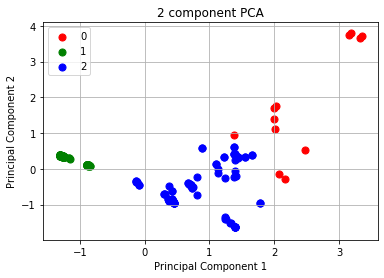

In [172]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca_1['kmeans'] == target
 ax.scatter(x_pca_1.loc[indicesToKeep, 0]
 , x_pca_1.loc[indicesToKeep, 1]
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

* **By looking at the above plot we can observe that there are 4 anomalies which belong to cluster '0' at position (3.8,3.9)**

## CONCLUSION

* **hereby by performing PCA and decreasing the dimension to 2 we have got about 50 % variance in the first two principal components**
* **when I plotted the pricipal component plot I found out few anomalies in the data towards in the  upper right corner in the plot**
